# Perkenalan

Perkenalkan nama saya Wildan Abdurrasyid seorang Mahasiswa sem 3 Institut Teknologi Tangerang Selatan.

pada proyek ini saya akan membuat Model NLP (Natural Language processing) sederhana dari dataset yang telah saya dapatkan.

link source dataset: https://www.kaggle.com/datasets/athu1105/book-genre-prediction

## Memuat **data**

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')
df = df.sample(n=2050, random_state=42)
df = df.drop(columns=['index', 'title'])
df.head()

,genre,summary
911,science,Thomas Jerome Newton is a humanoid alien who ...
1183,crime,Boston private detectives Patrick Kenzie and ...
33,fantasy,"Born on a splinter world, Lysaer and Arithon ..."
354,fantasy,Elsewhere tells the story of a fifteen year o...
322,fantasy,"The city of Phlan has vanished, and its citiz..."


## one-hot-encoding dan membuat dataframe baru.

In [2]:
category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='genre')
df_baru

,summary,crime,fantasy,history,horror,psychology,romance,science,sports,thriller,travel
911,Thomas Jerome Newton is a humanoid alien who ...,0,0,0,0,0,0,1,0,0,0
1183,Boston private detectives Patrick Kenzie and ...,1,0,0,0,0,0,0,0,0,0
33,"Born on a splinter world, Lysaer and Arithon ...",0,1,0,0,0,0,0,0,0,0
354,Elsewhere tells the story of a fifteen year o...,0,1,0,0,0,0,0,0,0,0
322,"The city of Phlan has vanished, and its citiz...",0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2619,Archaeologist Moira Rhalles is kidnapped by t...,0,0,0,0,0,0,0,0,1,0
4457,Only a true best friend can protect you from y...,0,1,0,0,0,0,0,0,0,0
742,The main characters are a former novelist nam...,0,0,0,0,0,0,1,0,0,0
637,The book takes place millennia in the future ...,0,0,0,0,0,0,1,0,0,0


mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array

In [3]:
text_column = 'summary'
genre_columns = ['crime', 'fantasy', 'history', 'horror', 'psychology', 'romance', 'science', 'sports', 'thriller', 'travel']
sinopsis = df_baru[text_column].values
label = df_baru[genre_columns].values

## Pembagian Data Training dan Testing

In [4]:
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

##  Tokenisasi

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih)
tokenizer.fit_on_texts(sinopsis_test)

sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

## Modelling dan Compile

In [6]:
import tensorflow as tf
# Membangun model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(genre_columns), activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Fungsi Callbacks

In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

## Latih Data dengan Callbacks

In [8]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, validation_data=(padded_test, label_test), callbacks=[callbacks], verbose=2)

Epoch 1/30
52/52 - 308s - loss: 2.0984 - accuracy: 0.2177 - val_loss: 2.0925 - val_accuracy: 0.1902 - 308s/epoch - 6s/step
Epoch 2/30
52/52 - 285s - loss: 2.0156 - accuracy: 0.2177 - val_loss: 2.0871 - val_accuracy: 0.1902 - 285s/epoch - 5s/step
Epoch 3/30
52/52 - 290s - loss: 1.9737 - accuracy: 0.2348 - val_loss: 2.0152 - val_accuracy: 0.2366 - 290s/epoch - 6s/step
Epoch 4/30
52/52 - 283s - loss: 1.8190 - accuracy: 0.2713 - val_loss: 1.9381 - val_accuracy: 0.2756 - 283s/epoch - 5s/step
Epoch 5/30
52/52 - 284s - loss: 1.5951 - accuracy: 0.3372 - val_loss: 2.0065 - val_accuracy: 0.2659 - 284s/epoch - 5s/step
Epoch 6/30
52/52 - 286s - loss: 1.3206 - accuracy: 0.4152 - val_loss: 2.1561 - val_accuracy: 0.2683 - 286s/epoch - 5s/step
Epoch 7/30
52/52 - 285s - loss: 1.1029 - accuracy: 0.5091 - val_loss: 2.3379 - val_accuracy: 0.2146 - 285s/epoch - 5s/step
Epoch 8/30
52/52 - 285s - loss: 0.9178 - accuracy: 0.6024 - val_loss: 2.8884 - val_accuracy: 0.2268 - 285s/epoch - 5s/step
Epoch 9/30
52/52

## Evaluate accuracy

In [9]:
train_accuracy = model.evaluate(padded_latih, label_latih, verbose=0)[1]
test_accuracy = model.evaluate(padded_test, label_test, verbose=0)[1]

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 92.44%
Test Accuracy: 23.66%


## Plot loss and accuracy

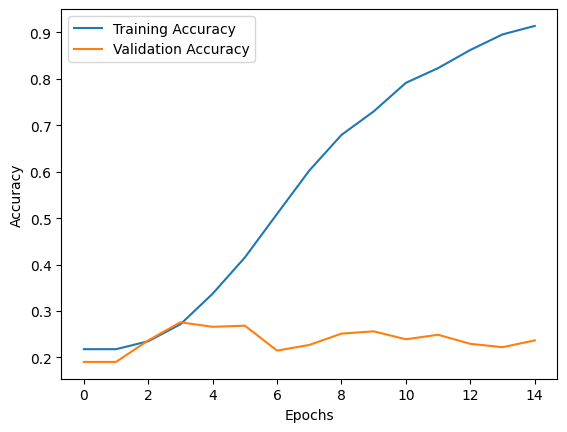

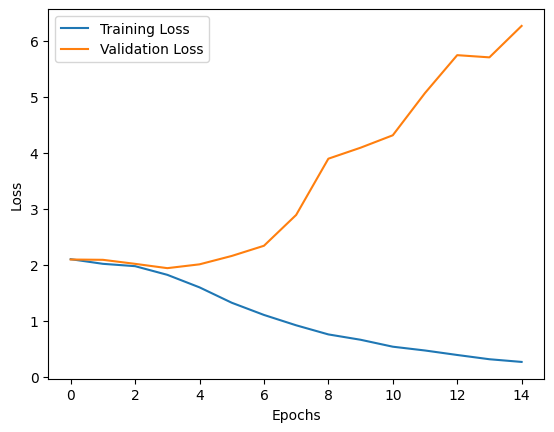

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Saya persembahkan hasil NLP yang telah saya terapkan, Sekian dari saya terima kasih